In [1]:
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing numpy for scientific computing
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing colormaps for data visualization
from matplotlib import colormaps
list(colormaps)
# Importing seaborn for data visualization
import seaborn as sns
# Importing warnings to ignore warnings
import Draft_wrangle as w
# Importing sklearn for machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
# Importing sklearn for machine learning        
from sklearn.model_selection import train_test_split
# Import the DecisionTreeClassifier from scikit-learn 
from sklearn.tree import DecisionTreeClassifier
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# Import the LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
# Import warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression, TweedieRegressor 
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Import feature selection tools
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Import train_test_split for model evaluation
from sklearn.model_selection import train_test_split

# Import R-squared (coefficient of determination) metric for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import scikit-learn preprocessing module for data preparation and feature engineering
import sklearn.preprocessing

# Import for LassoLars regression model
from sklearn.linear_model import LassoLars

# Import for DecisionTreeRegressor for decision tree-based regression
from sklearn.tree import DecisionTreeRegressor

# Import for mean_absolute_error metric to evaluate model performance
from sklearn.metrics import mean_absolute_error

# Import for RandomForestRegressor, an ensemble method for regression
from sklearn.ensemble import RandomForestRegressor
# Import for KNeighborsRegressor, a k-nearest neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

# Import for another instance of RandomForestRegressor, 
# possibly for comparison or ensemble use
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

sep_line = "=" * 60

IndentationError: unindent does not match any outer indentation level (Draft_wrangle.py, line 56)

In [8]:
# call the function to acquire the data from wrangle file for test data
test_outpatient_df,test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()
# call the function to acquire the data from wrangle file for train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()

In [9]:
def combine_fraud(df1, df2, sort_col):
    combined_df = pd.concat([df1, df2])
    sorted_df = combined_df.sort_values(by=sort_col)
    sorted_df = sorted_df.reset_index(drop=True)
    return sorted_df

In [10]:
fraud_df = combine_fraud(train_df, test_df, 'Provider')
fraud_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes


In [11]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [8]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [9]:
beneficiary_df = w.prep_beneficiary_data(beneficiary_df)
w.beneficiary_label_encode(beneficiary_df)
beneficiary_df = w.beneficiary_OneHotLabel_encode(beneficiary_df)
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


In [10]:
inpatient_df = w.wrangle_inpatient(inpatient_df)
inpatient_df = w.create_features_inpatient(inpatient_df)
inpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY000000,PHY000000,2009-04-12,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY000000,2009-08-31,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY000000,PHY324689,2009-09-17,...,32723,00000,00000,00000,00000,000,000,000,3,3


In [11]:
outpatient_df = w.wrangle_outpatient(outpatient_df)
outpatient_df = w.create_features_outpatient(outpatient_df)
outpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,clmdiagnosiscode_3,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY000000,PHY000000,78943,...,V1272,00000,00000,00000,00000,00000,00000,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,PHY000000,PHY000000,6115,...,00000,00000,00000,00000,00000,00000,00000,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,PHY000000,PHY000000,2723,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0


In [12]:
fraud_df = w.wrangle_fraud(fraud_df)
fraud_df.head()

,provider,potentialfraud,potentialfraud_encoded
0,PRV51001,No,0
2,PRV51003,Yes,1
3,PRV51004,No,0
4,PRV51005,Yes,1
6,PRV51007,No,0


In [13]:
outpatient_df = w.merge_outpatient_fraud(beneficiary_df, outpatient_df, fraud_df)
inpatient_df = w.merge_inpatient_fraud(beneficiary_df, inpatient_df, fraud_df)

In [21]:
sep_line = "=" * 60

# Exploreation 

In [22]:
# Outpatient Fraud Yes 
outpatient_fraud_df = outpatient_df[outpatient_df.potentialfraud == 'Yes']
# Inpatient Fraud Yes 
inpatient_fraud_df = inpatient_df[inpatient_df.potentialfraud == 'Yes']

print(f'Sum of outpatient -> {outpatient_fraud_df.claimid.count()}')
print(sep_line)
print(f'Sum of intpatient -> {inpatient_fraud_df.claimid.count()}')

Sum of outpatient -> 266948
Sum of intpatient -> 34014


In [23]:
# Outpatient Fraud No 
outpatient_NOT_fraud_df = outpatient_df[outpatient_df.potentialfraud == 'No']
# Inpatient Fraud No
inpatient_NOT_fraud_df = inpatient_df[inpatient_df.potentialfraud == 'No']

print(f'Sum of outpatient -> {outpatient_NOT_fraud_df.claimid.count()}')
print(sep_line)
print(f'Sum of intpatient -> {inpatient_NOT_fraud_df.claimid.count()}')

Sum of outpatient -> 480564
Sum of intpatient -> 24967


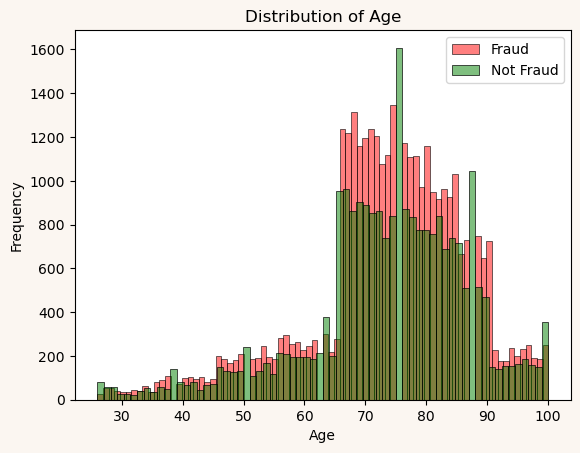

In [36]:
fig, ax = plt.subplots(facecolor='#FBF6F1')

sns.histplot(data=inpatient_fraud_df, x='age', color='red', alpha=0.5, ax=ax)
sns.histplot(data=inpatient_NOT_fraud_df, x='age', color='green', alpha=0.5, ax=ax) 

ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

ax.legend(['Fraud', 'Not Fraud'])

plt.show()

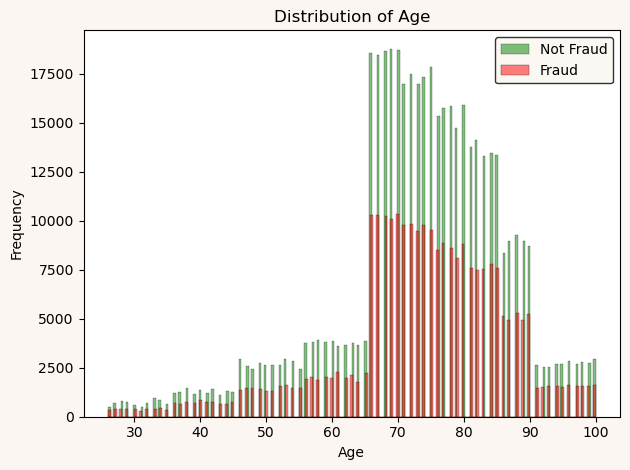

In [31]:
fig, ax = plt.subplots(facecolor='#FBF6F1') 

sns.histplot(data=outpatient_NOT_fraud_df, x='age', color='green', alpha=0.5, ax=ax)

sns.histplot(data=outpatient_fraud_df, x='age', color='red', alpha=0.5, ax=ax)

ax.set_title('Distribution of Age', color='black')
ax.set_xlabel('Age', color='black')
ax.set_ylabel('Frequency', color='black')

ax.legend(['Not Fraud', 'Fraud'])

legend = ax.get_legend()
legend.get_frame().set_facecolor('#FBF6F1')
legend.get_frame().set_edgecolor('black')
for text in legend.get_texts():
    text.set_color('black')
    
plt.tight_layout()
plt.show()

In [2]:
fraud_lengths = [1723, 1819, 1814, 1824, 1759, 1776, 1751, 1707, 1564, 641]
total_lengths = np.array(fraud_lengths) + np.array(not_fraud_lengths)
fraud_percentages = np.array(fraud_lengths) / total_lengths * 100
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10']
X_axis = np.arange(len(X))
plt.figure(facecolor='#FBF6F1')
plt.bar(X_axis - 0.2, fraud_percentages, 0.4, label='Fraud', color='lightcoral')
plt.xticks(X_axis, X)
# Set legend facecolor and text color
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud')
# Set plot text color
# Set plot background color and text color
plt.gca().set_facecolor('#FBF6F1')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()
# Print percentages
for i, x in enumerate(X):
    print(f"{x}: Fraud {fraud_percentages[i]:.2f}%, Not Fraud {not_fraud_percentages[i]:.2f}%")
plt.show()

NameError: name 'not_fraud_lengths' is not defined

CC_1: Fraud 53.26%, Not Fraud 46.74%
CC_2: Fraud 53.02%, Not Fraud 46.98%
CC_3: Fraud 53.40%, Not Fraud 46.60%
CC_4: Fraud 53.60%, Not Fraud 46.40%
CC_5: Fraud 52.87%, Not Fraud 47.13%
CC_6: Fraud 54.38%, Not Fraud 45.62%
CC_7: Fraud 53.63%, Not Fraud 46.37%
CC_8: Fraud 54.14%, Not Fraud 45.86%
CC_9: Fraud 52.91%, Not Fraud 47.09%
CC_10: Fraud 55.84%, Not Fraud 44.16%


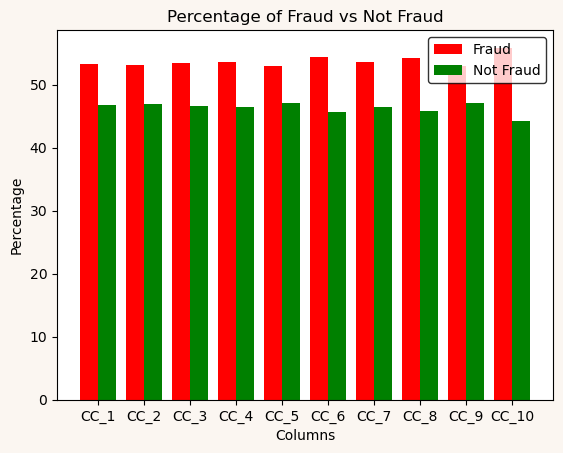

In [40]:
fraud_lengths = [1723, 1819, 1814, 1824, 1759, 1776, 1751, 1707, 1564, 641]
not_fraud_lengths = [1512, 1612, 1583, 1579, 1568, 1490, 1514, 1446, 1392, 507]
total_lengths = np.array(fraud_lengths) + np.array(not_fraud_lengths)
fraud_percentages = np.array(fraud_lengths) / total_lengths * 100
not_fraud_percentages = np.array(not_fraud_lengths) / total_lengths * 100
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9', 'CC_10']
X_axis = np.arange(len(X))
plt.figure(facecolor='#FBF6F1')
plt.bar(X_axis - 0.2, fraud_percentages, 0.4, label='Fraud', color='r')
plt.bar(X_axis + 0.2, not_fraud_percentages, 0.4, label='Not Fraud', color='g')
plt.xticks(X_axis, X)
# Set legend facecolor and text color
legend = plt.legend()
legend.get_frame().set_edgecolor('black')
for text in legend.get_texts():
    text.set_color('black')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud vs Not Fraud')
# Set plot text color
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')
# Print percentages
for i, x in enumerate(X):
    print(f"{x}: Fraud {fraud_percentages[i]:.2f}%, Not Fraud {not_fraud_percentages[i]:.2f}%")
plt.show()

CC_1: Fraud 47.35%, Not Fraud 52.65%
CC_2: Fraud 45.80%, Not Fraud 54.20%
CC_3: Fraud 45.29%, Not Fraud 54.71%
CC_4: Fraud 45.37%, Not Fraud 54.63%
CC_5: Fraud 44.68%, Not Fraud 55.32%
CC_6: Fraud 44.29%, Not Fraud 55.71%
CC_7: Fraud 44.54%, Not Fraud 55.46%
CC_8: Fraud 43.47%, Not Fraud 56.53%
CC_9: Fraud 43.90%, Not Fraud 56.10%


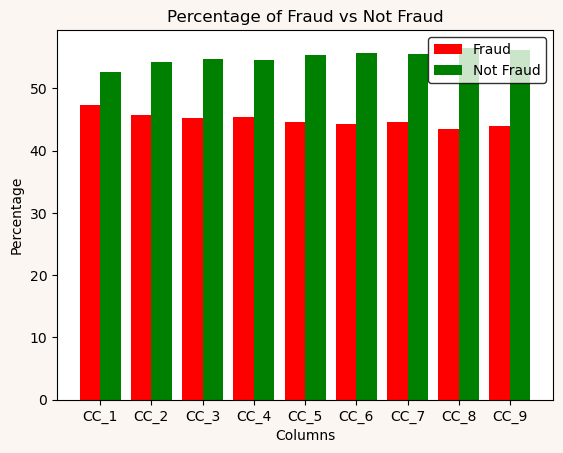

In [42]:
fraud_lengths = [8574, 3614, 3065, 2649, 2207, 1854, 1627, 1347, 1108]
not_fraud_lengths = [9534, 4277, 3703, 3190, 2733, 2332, 2026, 1752, 1416]
total_lengths = np.array(fraud_lengths) + np.array(not_fraud_lengths)
fraud_percentages = np.array(fraud_lengths) / total_lengths * 100
not_fraud_percentages = np.array(not_fraud_lengths) / total_lengths * 100
X = ['CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CC_8', 'CC_9']
X_axis = np.arange(len(X))
plt.figure(facecolor='#FBF6F1')
plt.bar(X_axis - 0.2, fraud_percentages, 0.4, label='Fraud', color='r')
plt.bar(X_axis + 0.2, not_fraud_percentages, 0.4, label='Not Fraud', color='g')
plt.xticks(X_axis, X)  # Set the x-axis labels to the values in the X list
# Set legend facecolor and text color
legend = plt.legend()
legend.get_frame().set_edgecolor('Black')
for text in legend.get_texts():
    text.set_color('Black')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud vs Not Fraud')
# Set plot text color
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.gca().title.set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')
# Print percentages
for i, x in enumerate(X):
    print(f"{x}: Fraud {fraud_percentages[i]:.2f}%, Not Fraud {not_fraud_percentages[i]:.2f}%")
plt.show()

<Figure size 800x600 with 0 Axes>

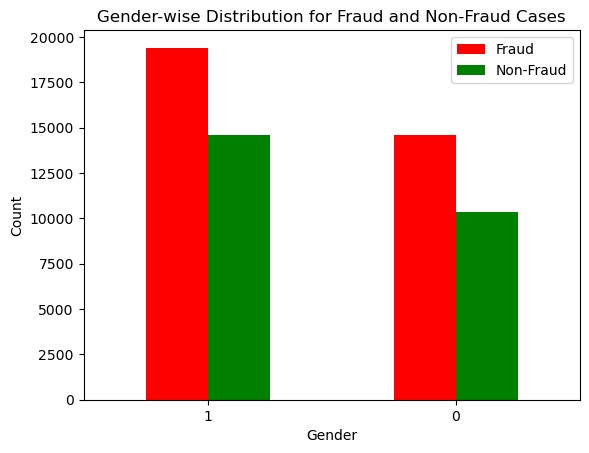

In [44]:
# Extract 'Gender' and 'Potential Fraud' columns from the DataFrame
subset_df = inpatient_df[['gender', 'potentialfraud']]
# Filter the DataFrame to include only 'fraud' and 'nonfraud' cases
fraud_cases = subset_df[subset_df['potentialfraud'] == 'Yes']
nonfraud_cases = subset_df[subset_df['potentialfraud'] == 'No']
# Calculate gender-wise counts for fraud and non-fraud cases
fraud_gender_counts = fraud_cases['gender'].value_counts()
nonfraud_gender_counts = nonfraud_cases['gender'].value_counts()
# Combine the counts into a single DataFrame
combined_df = pd.DataFrame({'Fraud': fraud_gender_counts, 'Non-Fraud': nonfraud_gender_counts})
# Create a bar chart
plt.figure(figsize=(8, 6))
combined_df.plot(kind='bar', color=['red', 'green'])
plt.title('Gender-wise Distribution for Fraud and Non-Fraud Cases')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

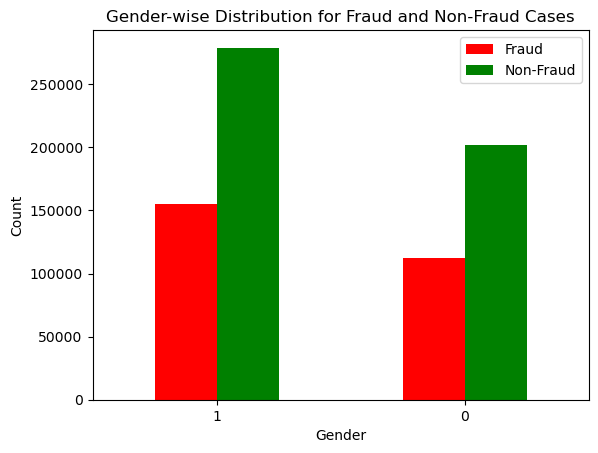

In [45]:
# Extract 'Gender' and 'Potential Fraud' columns from the DataFrame
subset_df = outpatient_df[['gender', 'potentialfraud']]
# Filter the DataFrame to include only 'fraud' and 'nonfraud' cases
fraud_cases = subset_df[subset_df['potentialfraud'] == 'Yes']
nonfraud_cases = subset_df[subset_df['potentialfraud'] == 'No']
# Calculate gender-wise counts for fraud and non-fraud cases
fraud_gender_counts = fraud_cases['gender'].value_counts()
nonfraud_gender_counts = nonfraud_cases['gender'].value_counts()
# Combine the counts into a single DataFrame
combined_df = pd.DataFrame({'Fraud': fraud_gender_counts, 'Non-Fraud': nonfraud_gender_counts})
# Create a bar chart
plt.figure(figsize=(8, 6))
combined_df.plot(kind='bar', color=['red', 'green'])
plt.title('Gender-wise Distribution for Fraud and Non-Fraud Cases')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()